In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [8]:
# parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S+00:00')
parser = lambda dates: [dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00') for x in dates]
data = pd.read_csv('ap-northeast-1.csv', parse_dates=[0], date_parser = parser, header = None)
data

,0,1,2,3,4
0,2017-05-08 21:46:36,c3.8xlarge,Windows,ap-northeast-1a,1.6503
1,2017-05-08 21:46:36,c3.8xlarge,Windows,ap-northeast-1c,1.7461
2,2017-05-08 21:46:34,i3.large,SUSE Linux,ap-northeast-1c,0.1223
3,2017-05-08 21:46:34,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
4,2017-05-08 21:46:17,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
...,...,...,...,...,...
1956995,2017-03-30 07:25:16,g2.2xlarge,Windows,ap-northeast-1c,0.1183
1956996,2017-03-30 07:25:13,m4.xlarge,Windows,ap-northeast-1c,0.2394
1956997,2017-03-30 07:25:13,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976
1956998,2017-03-30 07:25:13,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976


In [9]:
del data[3]
data.columns = ['date', 'type', 'product', 'price']
data

,date,type,product,price
0,2017-05-08 21:46:36,c3.8xlarge,Windows,1.6503
1,2017-05-08 21:46:36,c3.8xlarge,Windows,1.7461
2,2017-05-08 21:46:34,i3.large,SUSE Linux,0.1223
3,2017-05-08 21:46:34,i3.large,Linux/UNIX,0.0223
4,2017-05-08 21:46:17,c4.8xlarge,SUSE Linux,0.7890
...,...,...,...,...
1956995,2017-03-30 07:25:16,g2.2xlarge,Windows,0.1183
1956996,2017-03-30 07:25:13,m4.xlarge,Windows,0.2394
1956997,2017-03-30 07:25:13,c3.2xlarge,SUSE Linux,0.1976
1956998,2017-03-30 07:25:13,c3.2xlarge,Linux/UNIX,0.0976


In [10]:
data = data.drop_duplicates()
data

,date,type,product,price
0,2017-05-08 21:46:36,c3.8xlarge,Windows,1.6503
1,2017-05-08 21:46:36,c3.8xlarge,Windows,1.7461
2,2017-05-08 21:46:34,i3.large,SUSE Linux,0.1223
3,2017-05-08 21:46:34,i3.large,Linux/UNIX,0.0223
4,2017-05-08 21:46:17,c4.8xlarge,SUSE Linux,0.7890
...,...,...,...,...
1956995,2017-03-30 07:25:16,g2.2xlarge,Windows,0.1183
1956996,2017-03-30 07:25:13,m4.xlarge,Windows,0.2394
1956997,2017-03-30 07:25:13,c3.2xlarge,SUSE Linux,0.1976
1956998,2017-03-30 07:25:13,c3.2xlarge,Linux/UNIX,0.0976


In [11]:
f = lambda x: x[0]
pure_data = pd.DataFrame(data[(data['product'] == 'Windows') & (data['type'].apply(f) == 'i')])
pure_data.sort_values('date', inplace=True)
pure_data

,date,type,product,price
1956357,2017-03-30 07:36:21,i2.xlarge,Windows,0.2157
1955843,2017-03-30 07:45:27,i2.xlarge,Windows,0.2162
1955792,2017-03-30 07:46:27,i2.xlarge,Windows,0.2164
1955724,2017-03-30 07:47:27,i2.xlarge,Windows,0.2195
1955644,2017-03-30 07:48:27,i2.xlarge,Windows,0.2198
...,...,...,...,...
186,2017-05-08 21:38:45,i3.xlarge,Windows,0.2214
185,2017-05-08 21:38:45,i3.xlarge,Windows,0.2212
175,2017-05-08 21:39:07,i3.xlarge,Windows,0.2200
91,2017-05-08 21:42:29,i2.xlarge,Windows,0.2210


In [12]:
pure_data.dtypes

date       datetime64[ns]
type               object
product            object
price             float64
dtype: object

In [13]:
pure_data.isnull().sum()

date       0
type       0
product    0
price      0
dtype: int64

In [23]:
print(pure_data.type.unique())

['i2.xlarge' 'i2.8xlarge' 'i3.xlarge' 'i2.4xlarge' 'i3.large' 'i3.2xlarge'
 'i3.4xlarge' 'i2.2xlarge' 'i3.8xlarge' 'i3.16xlarge']


In [24]:
def get_weekly_dates(data):
    date = data.iloc[0, 0]
    dates = []
    while date < data.iloc[-1, 0]:
        date = date + dt.timedelta(days=7)
        dates.append(date)
    return dates

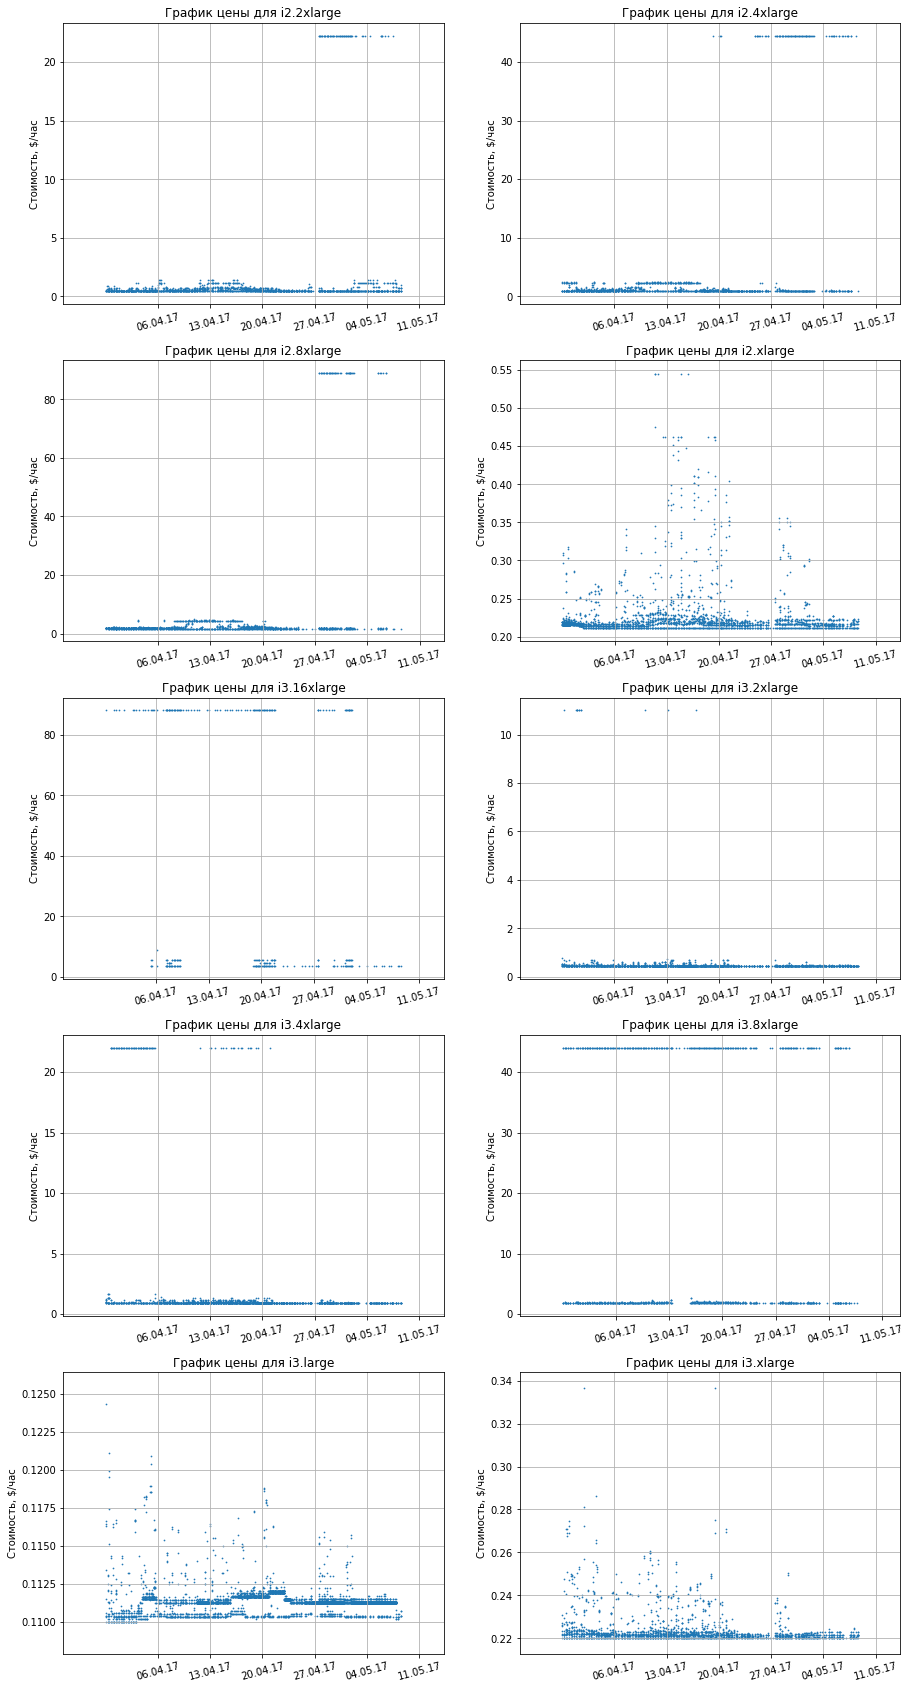

In [26]:
plt.figure(figsize=(15, 30))
i = 1
for name, group in pure_data.groupby(['type']):    
    plt.subplot(5, 2, i)
    plt.scatter(group['date'], group['price'], s=0.5)
    plt.title('График цены для {}'.format(name))
    # plt.xlabel('Даты')
    plt.ylabel('Стоимость, $/час')
    plt.grid()
    get_weekly_dates(group)
    plt.xticks(dates, labels=[pd.to_datetime(str(date)).strftime("%d.%m.%y") for date in dates], rotation = 15)
    i += 1
plt.show()